<a href="https://colab.research.google.com/github/Darij3/Bsc-Thesis-SEREMO/blob/master/semo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pakesu ieladesana
import tensorflow as tf #pakete, kas lauj izveidot masinmacisanas modeli
from tensorflow.keras import datasets, layers, models # tensoflow pakete, kas vajadiga, lai ieladed datasetus, modela slanus, un modelus
import matplotlib.pyplot as plt #Matlab pakete, lai attelot grafikus, attelus u.t. 
import functools #pakete lai apstradatu lielas funkcijas, funkcijas kas atgriez sevi(rekursijas), apstrada objektu, kuru var izmantot ka funkicju
import pandas as pd #bilioteka, aks laij apstradat daza veida tabulas
import numpy as np #biblioteka, kas apstrada masivus, FFT unt.t un apstradad dazada veida zinatniskus aprekinus
#import tensorflow as tf
#import numpy as np
import keras #biblioteka, kas apstrada neirona tiklu modelus, ieladess secigus modelus, vvg16( vai citas neirona tiklu modelus, 
#lieja ir paketes kas satur optimizatorus, slana veeidus.
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
from google.colab import drive #ielades csv failus vai attelu failus, no google draiva, vai lokala faila uz Jupyter Colab Notebook
drive.mount = ('/content/sample_data/fer2013.csv')# ievieto datubazi fer2013.csv no Google Drive

# csv failu ielade

In [0]:
#seit tiek naradits cels uz Jupyter Colab "sample_data", kas satur datubazi ar emocijasm, lai apstradat:
apmacibas_attelu_baze = "/content/sample_data/fer2013.csv" #apmacibai
testa_attelu_baze = "/content/sample_data/fer2013.csv" #testam

#train_file_path = tf.keras.utils.get_file("/content/sample_data/fer2013.csv", apmacibas_attelu_baze)#apmacibai
#test_file_path = tf.keras.utils.get_file("/content/sample_data/fer2013.csv", testa_attelu_baze)#testam

# fer2013.csv atversana un apstrade ar pandas

In [4]:
#atvert failu, lai apskatit to sataru
emocijas = pd.read_csv("/content/sample_data/fer2013.csv") #cels csv failam, lai atvertaar pandas biblioteku
emotion = ['Angry','Sad','Surprise','Disgust','Happy','Fear'], #klasifikacijas iezimes ar empcijam
display(emocijas)#atspogulo emocijas zem attela
plt.image = emocijas["pixels"][30] # var apskatit sejas ar emocijam, kas atrodas csv faila. atteli konverteti no pikseliem attela
val = image.split(" ")
#seit notiek attelu pareveidumi no pikseliem uz attelu ar izmeru 48x48 pikseliem.
x_pixels = np.array(val, 'float32')
x_pixels /= 255
x_reshaped = x_pixels.reshape(48,48)
plt.imshow(x_reshaped, cmap= "gray", interpolation="nearest")
plt.xlabel(emotion_labels)#atspogulo emociju
#norada to, cik var but emocijas csv faila
print('Samples per emotion:')
print(emocijas.emotion.value_counts())



FileNotFoundError: ignored

# datu vizualizacija: darbs ar attelu

(-0.5, 47.5, 47.5, -0.5)

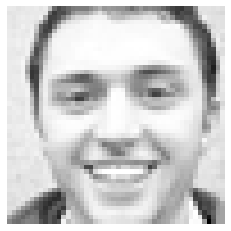

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

image = emocijas["pixels"][30] # pec ["pixels"] var nomainit ciparu, un upskatit citas emocijas
val = image.split(" ")
x_pixels = np.array(val, 'float32')
x_pixels /= 255
x_reshaped = x_pixels.reshape(48,48)
plt.imshow(x_reshaped, cmap= "gray", interpolation="nearest")
plt.axis("off")

# CNN VGG16 modelis

In [0]:
#leja ir CNN VGG16 modelis.
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD


# Generate dummy data
#x_train = np.random.random((100, 100, 100, 3))
#y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
#x_test = np.random.random((20, 100, 100, 3))
#y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

#temp_dataset = get_dataset(train_file_path, column_names=CSV_COLUMNS)
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd, )
#optimezaatora izvele, ietekme rezultatos 
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt ,metrics=['accuracy'])
model.summary()
#modela pielagosanas un apstrade apmacibai.(ang. val. model fit)
print('# Fit model on training data')
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=50,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(x_test, y_test))

print('\nhistory dict:', history.history)


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_79 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 22, 22, 64)      

In [0]:
model.metrics_names #papildus var apskatit izmantotas modela raditajus

['loss', 'accuracy']

# Modela validacija. Precizitate un Zudumi

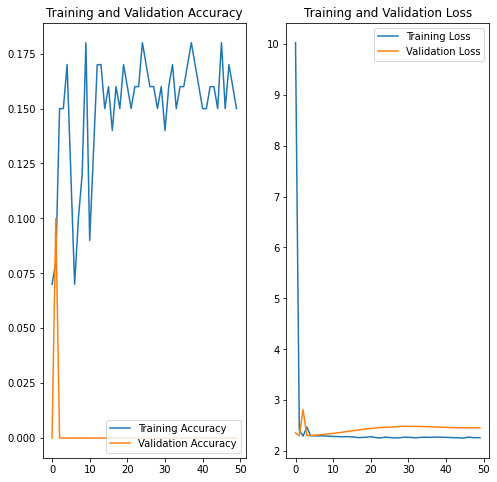

In [0]:
#Pirma dala tiek ievietotas precizitates un zudumu parametri
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

#precizitates grafiks
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#zudumu grafiks
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:
#rada modela precizitati
print(val_acc)

NameError: ignored

# Izmantotas apamacibas paragi programmai izveidei

https://www.tensorflow.org/tutorials/images/cnn - Convolutional Neural Network (CNN)
https://www.tensorflow.org/tutorials/images/cnn - Image classification
https://www.tensorflow.org/tutorials/images/cnn - Transfer learning with a pretrained ConvNet
